# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
colors = sns.color_palette("tab10")

# Data frame infomation

In [2]:
df = pd.read_csv("D:\ALICE PHAM\Case Study\Customer Shopping Trend\shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
#Checking missing value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
# Check duplicated data
duplicated_rows=df.duplicated()
quantity = duplicated_rows.sum()
print('Row duplicated:',quantity)

Row duplicated: 0


In [6]:
#Descriptive statistics data
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Data Visualization

## Number Customer by Gender

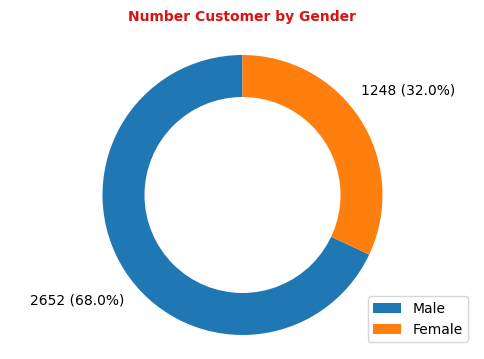

In [7]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(gender_counts) / 100, p),
        startangle=90, pctdistance=1.4, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(gender_counts.index, loc='lower right')
plt.title('Number Customer by Gender', weight="bold", color="#D71313", fontsize=10, pad=15)
plt.axis('equal')
plt.show()

## Age Distribution

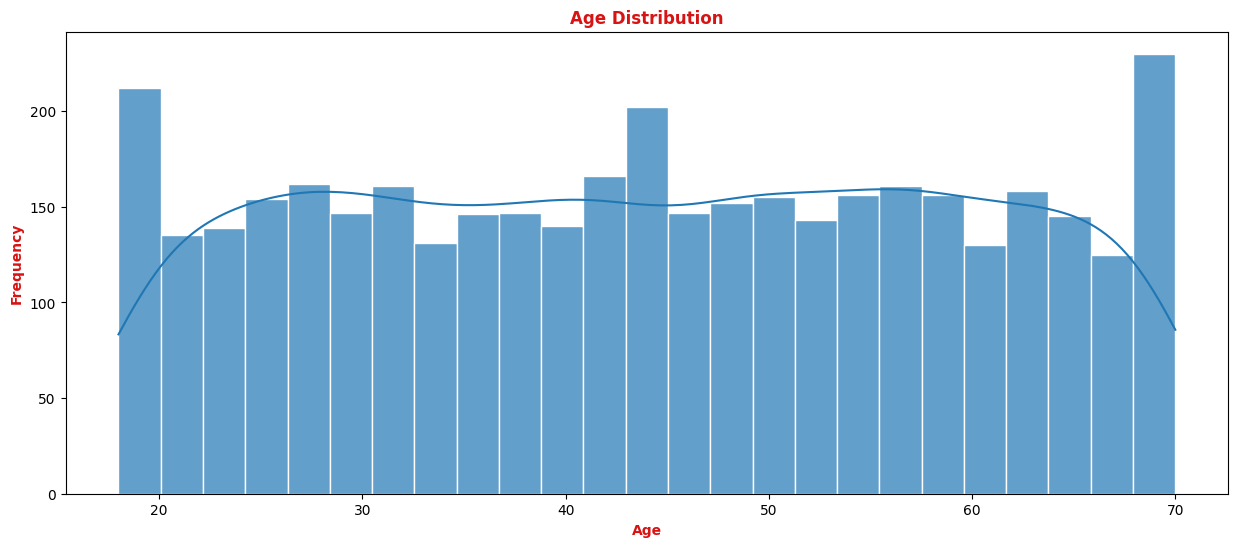

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=df, x='Age', bins=25, color=colors[0], edgecolor='white',kde=True, alpha=0.7, ax=ax)
ax.set_title('Age Distribution', weight='bold', color='#D71313', fontsize=12)
ax.set_xlabel('Age', weight='bold', color='#D71313', fontsize=10)
ax.set_ylabel('Frequency', weight='bold', color='#D71313', fontsize=10)
plt.show()

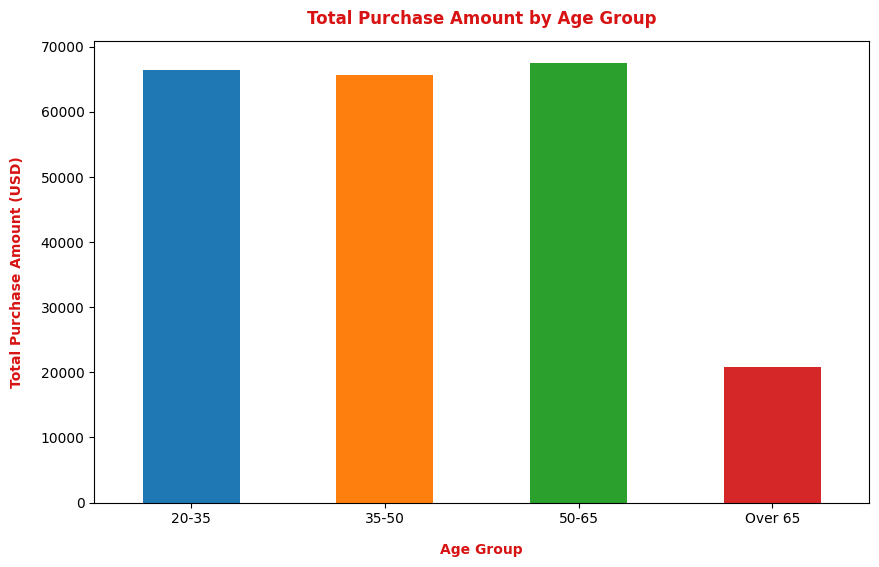

In [9]:
bins = [20, 35, 50, 65, df['Age'].max()]
labels = ['20-35', '35-50', '50-65','Over 65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

purchase_amount_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
purchase_amount_by_age_group.plot(kind='bar', color=colors)
plt.xlabel('Age Group', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 12)
plt.ylabel('Total Purchase Amount (USD)',weight = "bold", color = "#D71313", fontsize = 10, labelpad = 12)
plt.title('Total Purchase Amount by Age Group',weight = "bold", color = "#D71313", fontsize = 12, pad = 12)
plt.xticks(rotation=0)
plt.show()

## Number Customer by Category

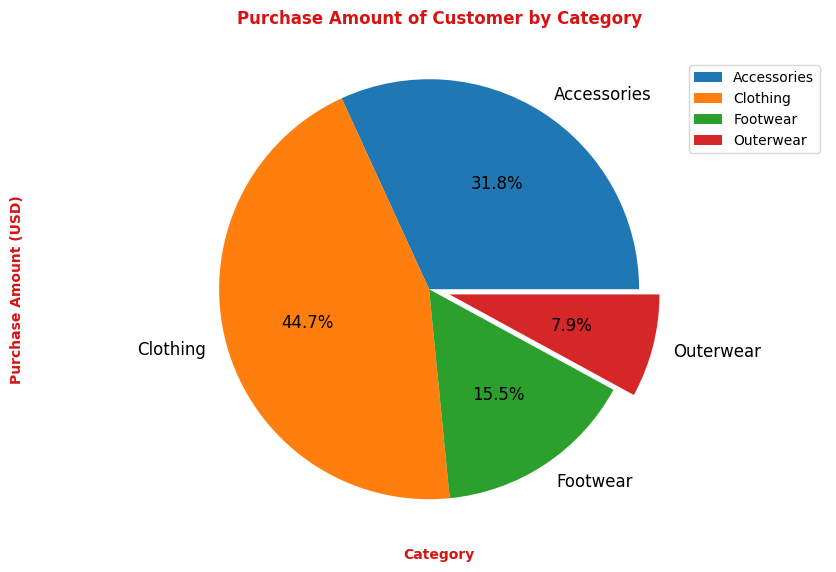

In [25]:
plt.figure(figsize = (10, 6))
counts = df.groupby('Category')['Purchase Amount (USD)'].sum()

explode = (0, 0.0, 0.0, 0.1)
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Category', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 20)
plt.ylabel('Purchase Amount (USD)', weight = "bold", color = "#D71313", fontsize = 10, labelpad = 20)

plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.title('Purchase Amount of Customer by Category', weight="bold", color="#D71313", fontsize=12, pad=25)
plt.show()

## Total Purchase Amount (USD) by Category and Season

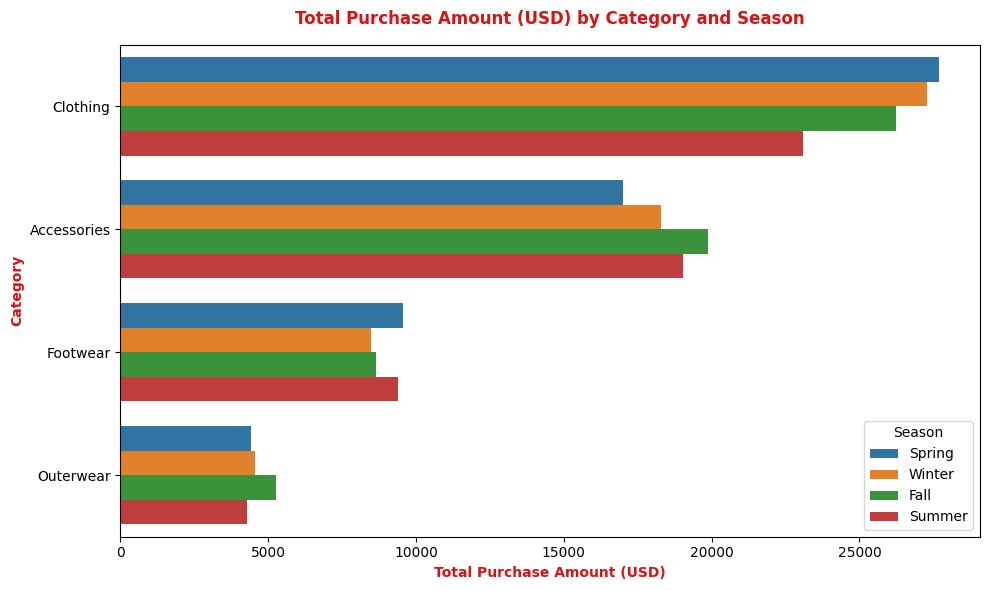

In [11]:
purchase_sum = df.groupby(['Category', 'Season'])['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Purchase Amount (USD)', y='Category', hue='Season', data=purchase_sum,palette=colors,orient='h')

plt.title('Total Purchase Amount (USD) by Category and Season',weight="bold", color="#D71313", fontsize=12, pad=15)
plt.xlabel('Total Purchase Amount (USD)',weight='bold', color='#D71313', fontsize=10)
plt.ylabel('Category',weight='bold', color='#D71313', fontsize=10)
plt.tight_layout()
plt.show()

## Treemap of Total Purchase Amount by Item Purchased

In [12]:
item_purchase_sum = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

item_purchase_sum_df = item_purchase_sum.reset_index()
item_purchase_sum_df.columns = ['Item Purchased', 'Total Purchase Amount (USD)']

fig = px.treemap(item_purchase_sum_df, path=['Item Purchased'], values='Total Purchase Amount (USD)',color_continuous_scale=colors)
fig.update_traces(root_color='skyblue')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), title='<b> Total Purchase Amount by Item Purchased</b>')
fig.update_traces(texttemplate='%{label}: %{value:.2s}', textposition='middle center', textfont_size=12)
fig.show()


## Purchase Amount by Shipping Type & Purchase Amount by Payment Method

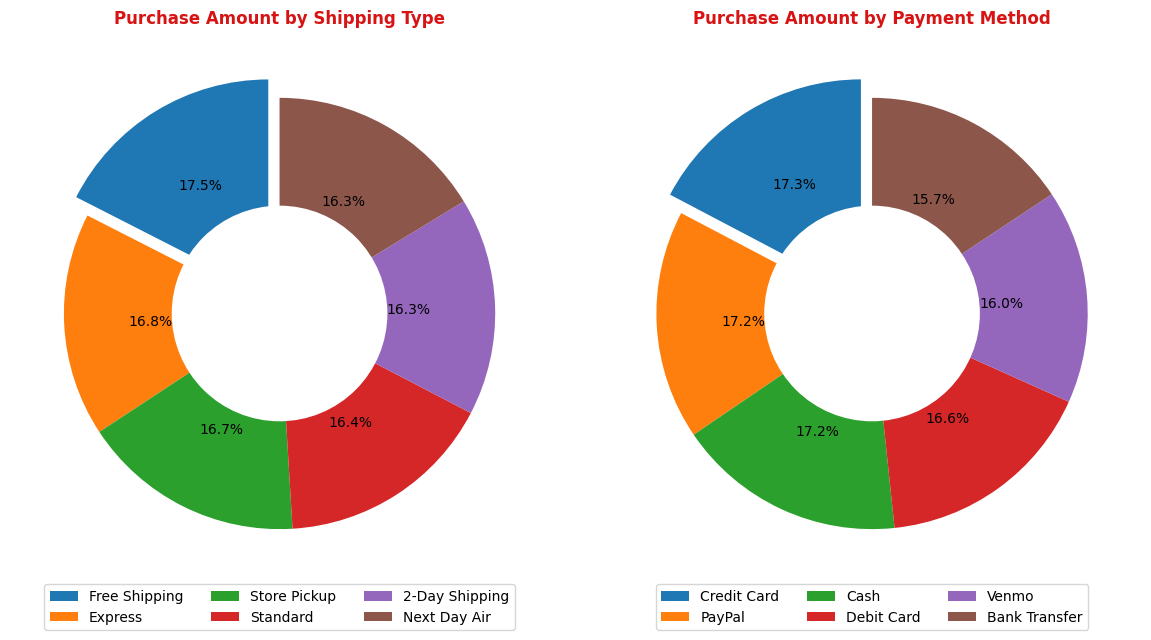

In [13]:
shipping_purchase = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
payment_purchase = df.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(shipping_purchase, autopct='%1.1f%%', startangle=90, colors= colors,explode =(0.1,0,0,0,0,0))
ax1.set_title('Purchase Amount by Shipping Type',weight="bold", color="#D71313", fontsize=12, pad=15)
ax1.legend(shipping_purchase.index, loc='lower center',ncol=3,bbox_to_anchor=(0.5, -0.1))

ax2.pie(payment_purchase, autopct='%1.1f%%', startangle=90, colors= colors,explode =(0.1,0,0,0,0,0))
ax2.set_title('Purchase Amount by Payment Method', weight="bold", color="#D71313", fontsize=12, pad=15)
ax2.legend(payment_purchase.index, loc='lower center',ncol=3,bbox_to_anchor=(0.5, -0.1))

circle = plt.Circle((0,0),0.5,fc='white')
ax1.add_artist(circle)
circle = plt.Circle((0,0),0.5,fc='white')
ax2.add_artist(circle)

plt.tight_layout()
plt.show()

## WordClound of color

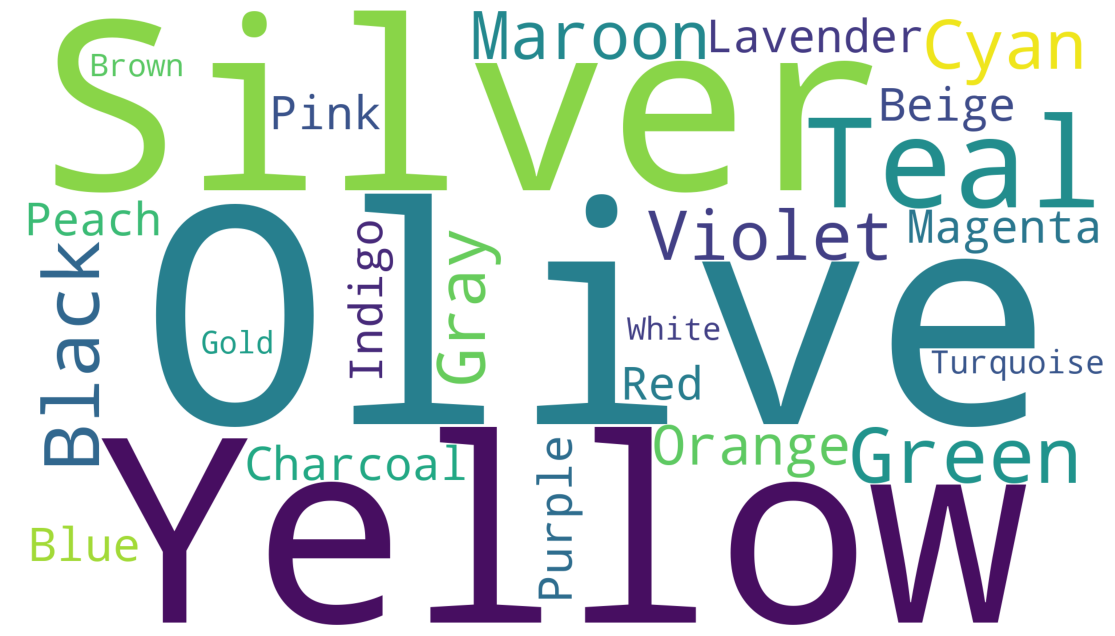

In [14]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Color']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Top 10 Locations with Highest Purchase Amount (USD)

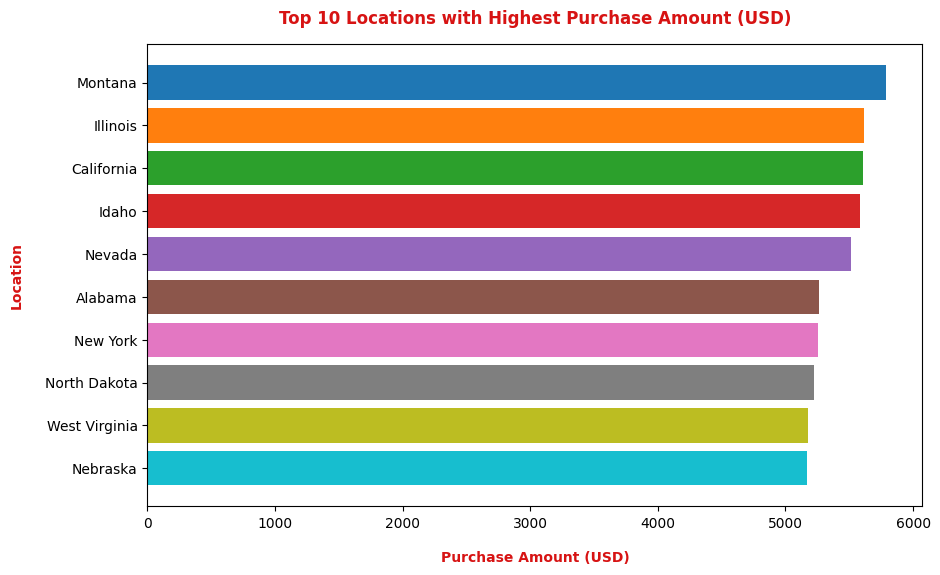

In [15]:
top_locations = df.groupby('Location')['Purchase Amount (USD)'].sum().nlargest(10)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(top_locations.index, top_locations.values, color=colors)
plt.xlabel('Purchase Amount (USD)',weight="bold", color="#D71313", fontsize=10, labelpad=15)
plt.ylabel('Location',weight="bold", color="#D71313", fontsize=10, labelpad=15)
plt.title('Top 10 Locations with Highest Purchase Amount (USD)',weight="bold", color="#D71313", fontsize=12, pad=15)
plt.gca().invert_yaxis()  
plt.show()

# Clustering

In [16]:
data_numeric = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

## StandardScaler

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

## Using the elbow method to optimize clustering

In [18]:
nbClusters = range(1, 6)
scores = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(data_numeric)
    scores.append(model.inertia_)

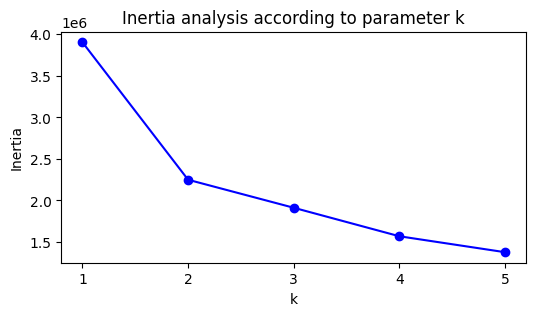

In [19]:
##  Visual representation Inertia --> definite elbow
plt.figure(figsize = (6, 3))
plt.plot(nbClusters, scores, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Inertia')
plt.title('Inertia analysis according to parameter k')

plt.show()

In [20]:
# Number of optimizing clustering: 4
k     = 4 
model = KMeans(n_clusters = k)
data_numeric['Cluster'] = model.fit_predict(data_numeric)

In [21]:
# Number of each cluster
labels = model.labels_
cluster_counts = pd.Series(labels).value_counts().sort_index()
print(cluster_counts)

0    965
1    977
2    974
3    984
Name: count, dtype: int64


# Cluster Visualization

## Cluster Visualization based on Previous Purchases and Purchase Amount

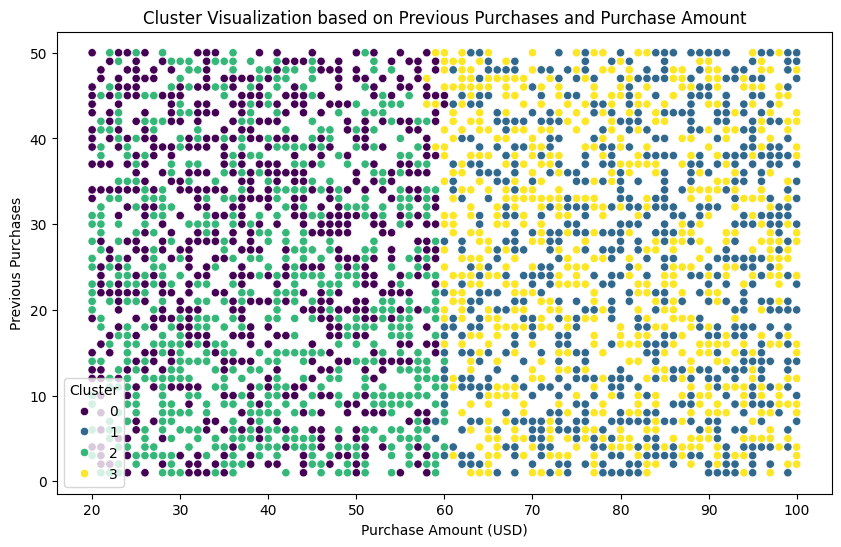

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Previous Purchases', hue='Cluster', data=data_numeric, palette='viridis')
plt.title('Cluster Visualization based on Previous Purchases and Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.show()

## Cluster Visualization based on Age and Purchase Amount

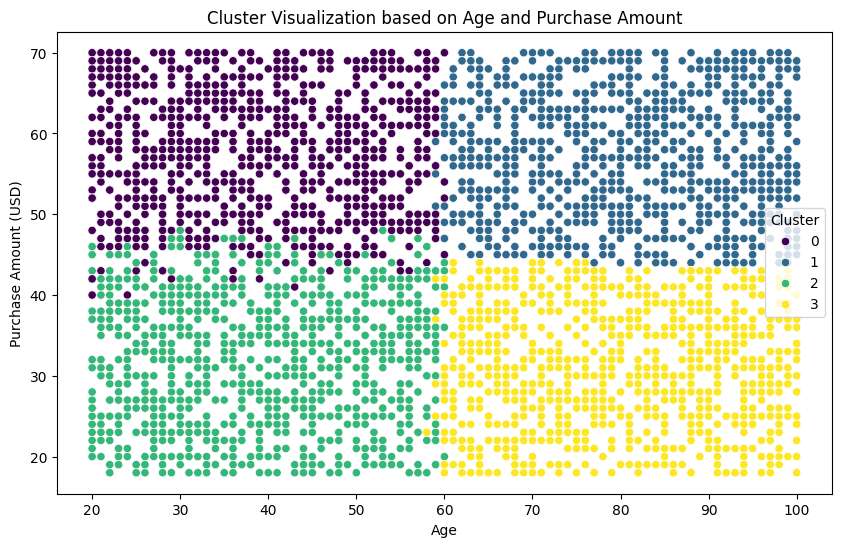

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Age', hue='Cluster', data=data_numeric, palette='viridis')
plt.title('Cluster Visualization based on Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

## Cluster Visualization based on Review Rating and Purchase Amount 

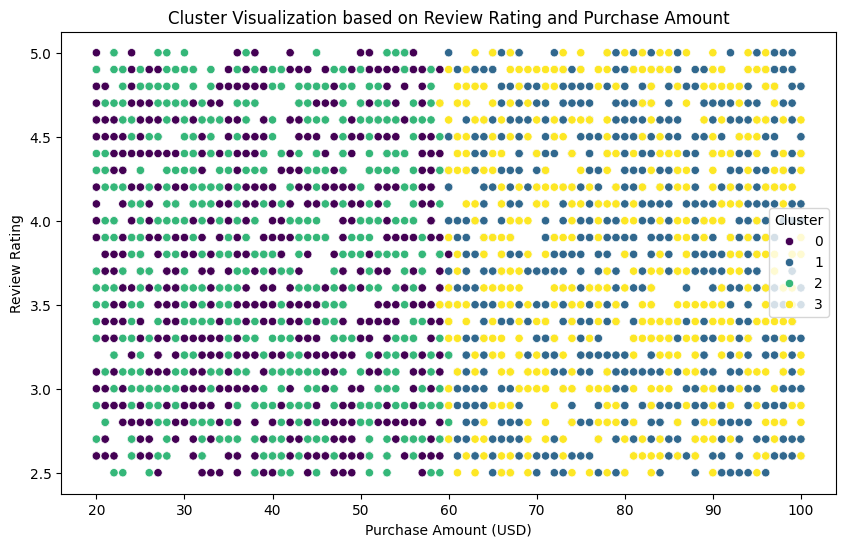

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase Amount (USD)', y='Review Rating', hue='Cluster', data=data_numeric, palette='viridis')
plt.title('Cluster Visualization based on Review Rating and Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()